## The Problem of Over-Fitting

In [9]:
library(AppliedPredictiveModeling)
data(twoClassData)
#?twoClassData

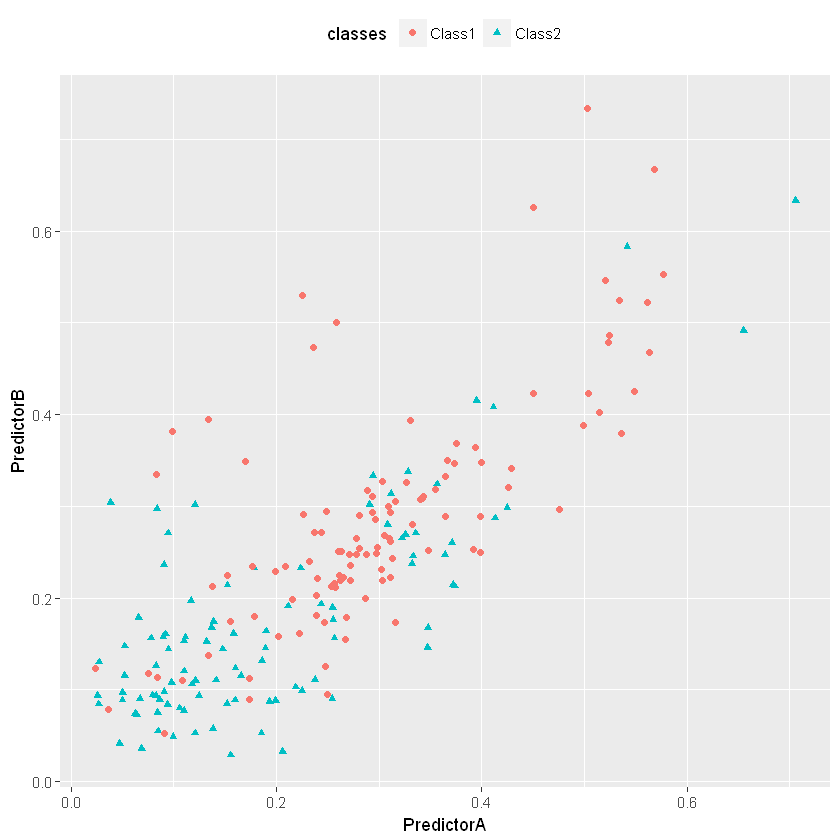

In [10]:
# library(lattice)
# xyplot(PredictorB ~ PredictorA, data = predictors, groups = classes, auto.key = TRUE)
library(ggplot2)
ggplot(data=predictors,aes(x=PredictorA,y=PredictorB,color=classes,shape=classes)) + geom_point() +theme(legend.position="top")

## Model Tuning
## Data Splitting
> `code from computing`

In [11]:
library(caret)
set.seed(1)
trn_id<- createDataPartition(classes,p=0.80,list=F)

trn_X <- predictors[trn_id,]
trn_y <- classes[trn_id]

test_X <- predictors[-trn_id,]
test_y <- classes[-trn_id]

## Resampling Techniques

In [12]:
library(caret)
set.seed(1)
rept_splits <- createDataPartition(trn_y,p=.80,times=2)
str(rept_splits)

List of 2
 $ Resample1: int [1:135] 1 2 4 5 6 8 9 10 11 12 ...
 $ Resample2: int [1:135] 2 3 4 6 7 8 9 11 14 15 ...


In [13]:
set.seed(1)
cv_splits <- createFolds(trn_y,k=10,returnTrain = T)
str(cv_splits)

List of 10
 $ Fold01: int [1:151] 2 3 4 5 6 7 11 12 13 14 ...
 $ Fold02: int [1:150] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold03: int [1:150] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold04: int [1:151] 1 2 3 4 5 7 8 9 10 11 ...
 $ Fold05: int [1:150] 1 2 3 5 6 7 8 9 10 11 ...
 $ Fold06: int [1:150] 1 2 3 4 5 6 8 9 10 11 ...
 $ Fold07: int [1:150] 1 3 4 5 6 7 8 9 10 11 ...
 $ Fold08: int [1:151] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold09: int [1:150] 1 2 4 5 6 7 8 9 10 12 ...
 $ Fold10: int [1:150] 1 2 3 4 6 7 8 9 10 11 ...


In [14]:
fold_1 <- cv_splits[[1]]
cv_X_1 <- trn_X[fold_1,]
cv_y_1 <- trn_y[fold_1]

nrow(trn_X)
nrow(cv_X_1)

[1] 167

[1] 151

## Case Study: Credit Scoring

In [19]:
library(caret)
data(GermanCredit)

In [20]:
GermanCredit <- GermanCredit[, -nearZeroVar(GermanCredit)]
GermanCredit$CheckingAccountStatus.lt.0 <- NULL
GermanCredit$SavingsAccountBonds.lt.100 <- NULL
GermanCredit$EmploymentDuration.lt.1 <- NULL
GermanCredit$EmploymentDuration.Unemployed <- NULL
GermanCredit$Personal.Male.Married.Widowed <- NULL
GermanCredit$Property.Unknown <- NULL
GermanCredit$Housing.ForFree <- NULL

In [21]:
set.seed(100)
trn_id <- createDataPartition(GermanCredit$Class, p = .8)[[1]]
trn <- GermanCredit[ trn_id, ]
test  <- GermanCredit[-trn_id, ]

In [22]:
set.seed(1056)
fit_svm <- train(Class ~ .,
                data = trn,
                method = "svmRadial",
               preProc = c("center", "scale"),
                tuneLength = 10,
                trControl = trainControl(method = "repeatedcv", 
                                         repeats = 5,
                                         classProbs = TRUE))

fit_svm

Support Vector Machines with Radial Basis Function Kernel 

800 samples
 41 predictor
  2 classes: 'Bad', 'Good' 

Pre-processing: centered (41), scaled (41) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  C       Accuracy  Kappa    
    0.25  0.74300   0.3542454
    0.50  0.74250   0.3542944
    1.00  0.74325   0.3292659
    2.00  0.74625   0.3309138
    4.00  0.75325   0.3320549
    8.00  0.74925   0.3181382
   16.00  0.74475   0.2953169
   32.00  0.74375   0.2984285
   64.00  0.74075   0.2929082
  128.00  0.73800   0.2841027

Tuning parameter 'sigma' was held constant at a value of 0.01418087
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01418087 and C = 4.

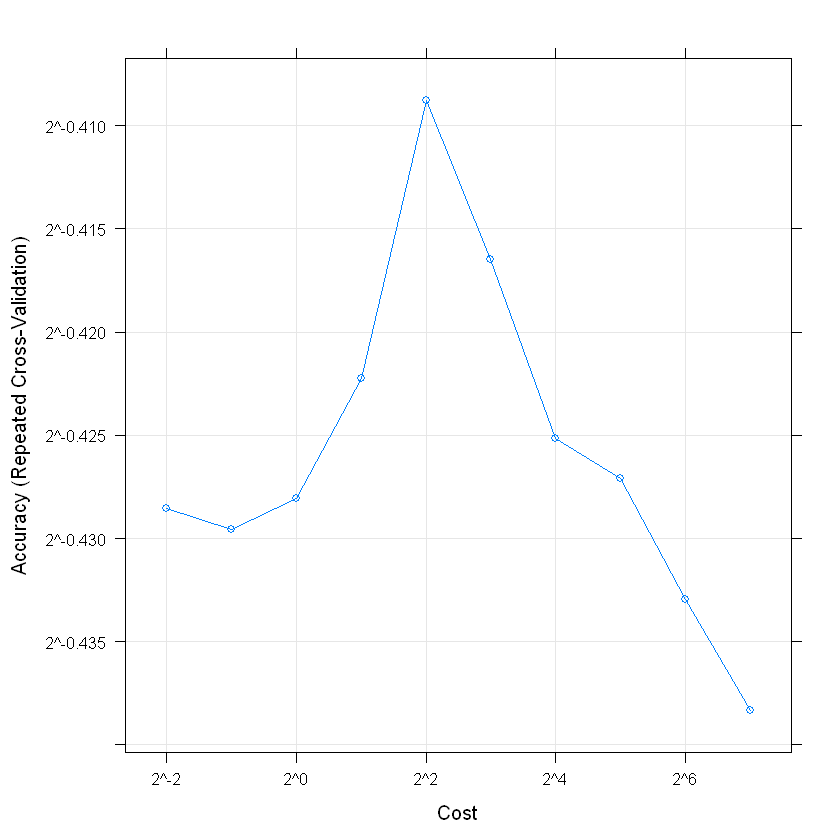

In [23]:
plot(fit_svm,scales=(x=list(log=2)))

In [25]:
pred_cls <- predict(fit_svm,test,type="prob")
head(pred_cls)

Bad,Good
0.5712094,0.4287906
0.5030683,0.4969317
0.3377723,0.6622277
0.1025021,0.8974979
0.6227635,0.3772365
0.1498071,0.8501929


## Choosing Final Tuning Parameters
## Data Splitting Recommendations
## Choosing Beteen Models
## Computing

### Basic Model Building in R

In [16]:
trn_X <- as.matrix(trn_X)
fit_knn <- knn3(x=trn_X,y=trn_y,k=5)
fit_knn

5-nearest neighbor model
Training set outcome distribution:

Class1 Class2 
    89     78 


In [17]:
test_y <- predict(fit_knn,newdata = test_X)
head(test_y)
str(test_y)

Class1,Class2
0.0,1.0
0.0,1.0
1.0,0.0
0.6,0.4
0.2,0.8
0.2,0.8


 num [1:41, 1:2] 0 0 1 0.6 0.2 0.2 0.2 0 0.2 0.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "Class1" "Class2"


### Determination of Tuning Parameters